In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- CONFIGURAÇÃO DE DESIGN ---
PALETA = {
    'arabica': '#02A556',
    'robusta': '#CC2229',
    'spread':  '#F1AC24',
    'texto':   '#022B49',
    'grid':    '#0393BD',
    'fundo_bbox': 'white'
}

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Carregando os dados
df = pd.read_parquet('../data/processed/dados_completos_commodities.parquet')

print("--- Dados Carregados para Estatística ---")
display(df.tail())

--- Dados Carregados para Estatística ---


,Date,Dolar,Arabica,Robusta,Arabica_BRL,Robusta_BRL
1295,2026-01-12,5.3703,356.049988,3845.0,2529.24,1238.93
1296,2026-01-13,5.3737,360.250000,3882.0,2560.70,1251.64
1297,2026-01-14,5.3713,356.000000,3879.0,2529.36,1250.12
1298,2026-01-15,5.3961,358.100006,3923.0,2556.03,1270.13
1299,2026-01-16,5.3694,355.100006,4013.0,2522.07,1292.84


In [2]:
# --- ENGENHARIA DE FEATURES (CRIANDO OS RETORNOS) ---
# O método .pct_change() calcula quanto o preço mudou em % em relação a ontem.
# Exemplo: Se ontem foi 100 e hoje é 101, o retorno é 0.01 (1%).

df['Retorno_Arabica'] = df['Arabica_BRL'].pct_change()
df['Retorno_Robusta'] = df['Robusta_BRL'].pct_change()

# O primeiro dia sempre fica vazio (NaN) porque não tem "ontem" para comparar.
# remover essa primeira linha para não dar erro nas contas.
df_stats = df.dropna().copy()

print("--- Tabela de Retornos Diários (Base para Volatilidade) ---")
display(df_stats[['Date', 'Retorno_Arabica', 'Retorno_Robusta']].head())

--- Tabela de Retornos Diários (Base para Volatilidade) ---


,Date,Retorno_Arabica,Retorno_Robusta
1,2021-01-20,-0.003829,0.005698
2,2021-01-21,-0.002502,-0.024891
3,2021-01-22,-0.008035,0.001214
4,2021-01-25,0.015095,0.020905
5,2021-01-26,0.010145,0.012230


--- Risco Anualizado (Volatilidade) ---
Arábica: 38.0%
Robusta: 33.6%
Heatmap salvo em '../img/fig03_Volatilidade.png'


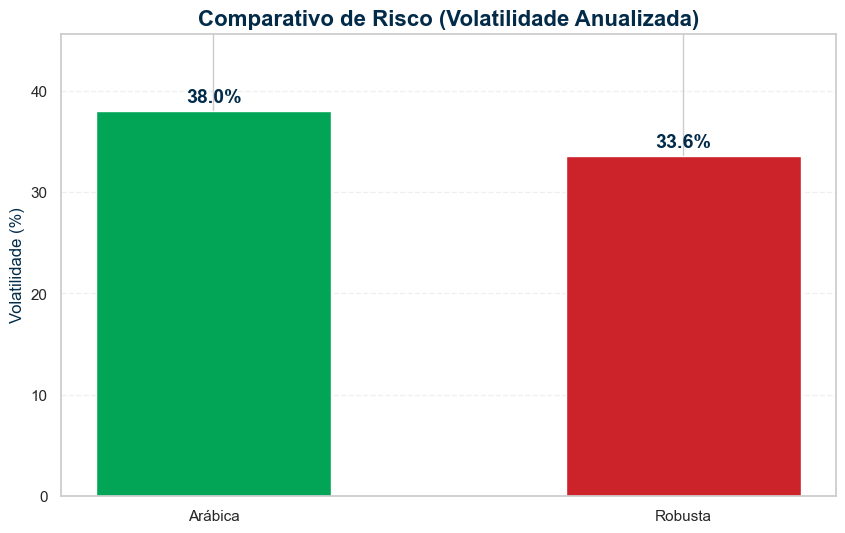

In [3]:
# --- 1. CÁLCULO DOS RETORNOS (NUMÉRICO PURO) ---
df['Retorno_Arabica'] = df['Arabica_BRL'].pct_change()
df['Retorno_Robusta'] = df['Robusta_BRL'].pct_change()

df_stats = df.dropna().copy()

# --- 2. CÁLCULO DA VOLATILIDADE (O RISCO) ---
# Multiplicamos por 100 apenas aqui na variável visual para o gráfico ler "38" e não "0.38"
vol_arabica = (df_stats['Retorno_Arabica'].std() * np.sqrt(252)) * 100
vol_robusta = (df_stats['Retorno_Robusta'].std() * np.sqrt(252)) * 100

print(f"--- Risco Anualizado (Volatilidade) ---")
print(f"Arábica: {vol_arabica:.1f}%")
print(f"Robusta: {vol_robusta:.1f}%")

# --- 3. VISUALIZAÇÃO DO RISCO ---
plt.figure(figsize=(10, 6))

ativos = ['Arábica', 'Robusta']
riscos = [vol_arabica, vol_robusta] # Agora já estão em escala de 0 a 100
cores  = [PALETA['arabica'], PALETA['robusta']]

barras = plt.bar(ativos, riscos, color=cores, width=0.5)

# Agora o fmt='%.1f%%' vai pegar o valor 38.0 e escrever "38.0%"
plt.bar_label(barras, fmt='%.1f%%', padding=3, fontsize=14, fontweight='bold', color=PALETA['texto'])

plt.title('Comparativo de Risco (Volatilidade Anualizada)', fontsize=16, fontweight='bold', color=PALETA['texto'])
plt.ylabel('Volatilidade (%)', fontsize=12, color=PALETA['texto'])
plt.ylim(0, max(riscos) * 1.2) 
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.savefig('../img/fig03_Volatilidade.png', dpi=300, bbox_inches='tight')
print("Heatmap salvo em '../img/fig03_Volatilidade.png'")

plt.show()

--- Matriz de Correlação ---


,Retorno_Arabica,Retorno_Robusta
Retorno_Arabica,1.000000,0.706087
Retorno_Robusta,0.706087,1.000000


Heatmap salvo em '../img/fig04_Matriz_de_Correlacao.png'


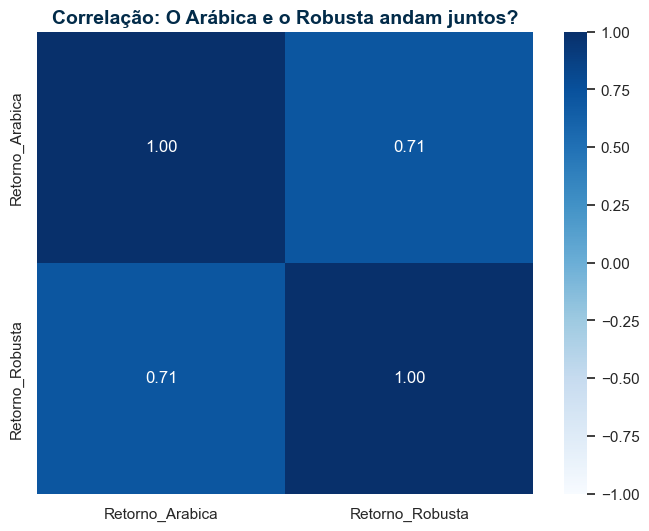

In [4]:
# --- CÁLCULO DA CORRELAÇÃO ---
correlacao = df_stats[['Retorno_Arabica', 'Retorno_Robusta']].corr()

print("--- Matriz de Correlação ---")
display(correlacao)

# --- VISUALIZAÇÃO (HEATMAP) ---
plt.figure(figsize=(8, 6))

# Mapa de Calor
sns.heatmap(correlacao, 
            annot=True,          
            fmt=".2f",           
            cmap="Blues",        
            vmin=-1, vmax=1,     
            cbar=True)           

plt.title('Correlação: O Arábica e o Robusta andam juntos?', fontsize=14, fontweight='bold', color=PALETA['texto'])

plt.savefig('../img/fig04_Matriz_de_Correlacao.png', dpi=300, bbox_inches='tight')
print("Heatmap salvo em '../img/fig04_Matriz_de_Correlacao.png'")

plt.show()
